In [9]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Load dataset

In [10]:
image_size = (128, 128)
batch_size = 32
train_set = tf.keras.utils.image_dataset_from_directory(
    directory="dataset/training_set",
    image_size=image_size,
    batch_size=batch_size,
    validation_split=0.2,
    subset="training",
    shuffle=True,
    seed=42
)

val_set = tf.keras.utils.image_dataset_from_directory(
    directory="dataset/training_set",
    image_size=image_size,
    batch_size=batch_size,
    validation_split=0.2,
    subset="validation",
    seed=42
)

test_set = tf.keras.utils.image_dataset_from_directory(
    directory="dataset/test_set",
    image_size=image_size,
    batch_size=batch_size,
    shuffle=False
)

Found 8000 files belonging to 2 classes.
Using 6400 files for training.
Found 8000 files belonging to 2 classes.
Using 1600 files for validation.
Found 2000 files belonging to 2 classes.


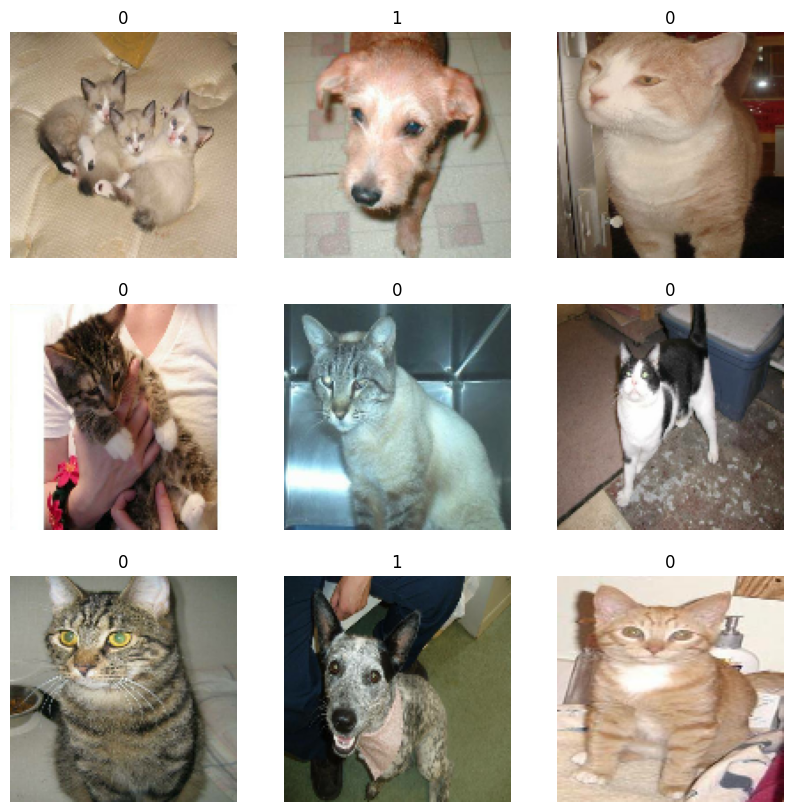

In [11]:
plt.figure(figsize=(10, 10))
for images, labels in train_set.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(np.array(images[i]).astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

# Augment Train Set

In [53]:
augmentation_layer = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
])

AUTOTUNE = tf.data.AUTOTUNE

train_set = train_set.map(
    lambda img, label: (augmentation_layer(img, training=True), label),
    num_parallel_calls=AUTOTUNE
)

train_set = train_set.prefetch(AUTOTUNE)
val_set = val_set.prefetch(AUTOTUNE)

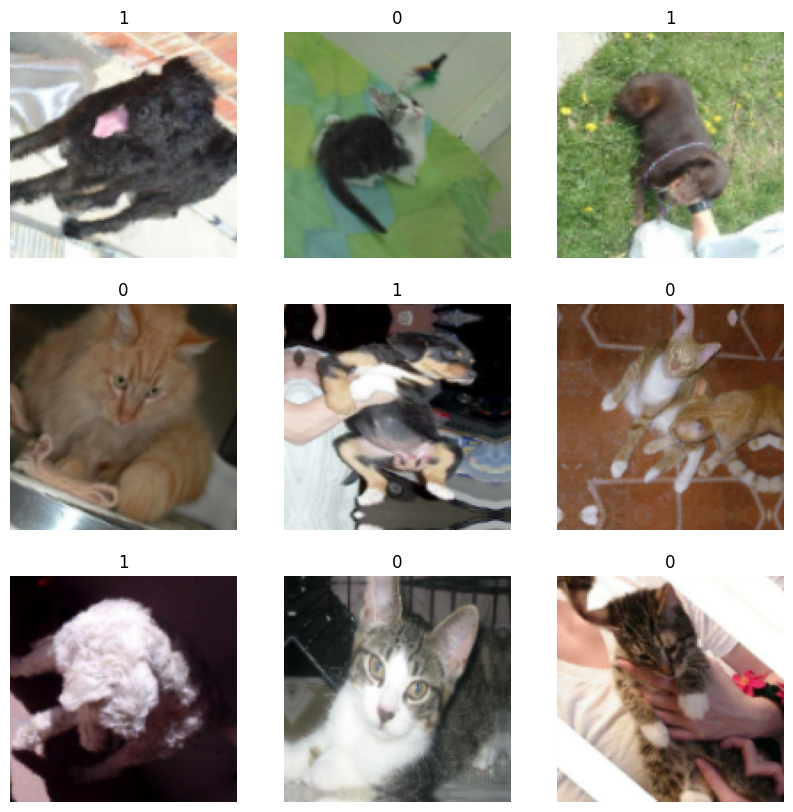

In [54]:
plt.figure(figsize=(10, 10))
for images, labels in train_set.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(np.array(images[i]).astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

# Convoluntional Neural Network Model Building

In [65]:
model = tf.keras.Sequential([
    layers.Input(shape=(128, 128, 3)),
    layers.Rescaling(1./255),
    layers.Conv2D(filters=32, kernel_size=5,activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),

    layers.Conv2D(filters=64, kernel_size=3,activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),

    layers.Conv2D(filters=128, kernel_size=3,activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),

    layers.Conv2D(filters=256, kernel_size=3,activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),

    layers.GlobalAveragePooling2D(),

    layers.Dense(units=128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(units=64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(units=32, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(units=1, activation='sigmoid')
])

model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_5 (Rescaling)              │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_28 (Conv2D)                   │ (None, 124, 124, 32)        │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_20               │ (None, 124, 124, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_28 (MaxPooling2D)      │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_29 (Conv2D)                   │ (None, 60, 60, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_21               │ (None, 60, 60, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_29 (MaxPooling2D)      │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_30 (Conv2D)                   │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_22               │ (None, 28, 28, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_30 (MaxPooling2D)      │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_31 (Conv2D)                   │ (None, 12, 12, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_23               │ (None, 12, 12, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_31 (MaxPooling2D)      │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_5           │ (None, 256)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 32)                  │           2,0

 Total params: 435,137 (1.66 MB)

 Trainable params: 434,177 (1.66 MB)

 Non-trainable params: 960 (3.75 KB)

In [58]:
opt = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(train_set, validation_data=val_set, epochs=35)

Epoch 1/35
200/200 ━━━━━━━━━━━━━━━━━━━━ 32s 118ms/step - accuracy: 0.5458 - loss: 0.7245 - val_accuracy: 0.4919 - val_loss: 0.7444
Epoch 2/35
200/200 ━━━━━━━━━━━━━━━━━━━━ 23s 112ms/step - accuracy: 0.5928 - loss: 0.6730 - val_accuracy: 0.5306 - val_loss: 0.7026
Epoch 3/35
200/200 ━━━━━━━━━━━━━━━━━━━━ 42s 116ms/step - accuracy: 0.6150 - loss: 0.6606 - val_accuracy: 0.5319 - val_loss: 0.7221
Epoch 4/35
200/200 ━━━━━━━━━━━━━━━━━━━━ 41s 114ms/step - accuracy: 0.6114 - loss: 0.6598 - val_accuracy: 0.6112 - val_loss: 0.6482
Epoch 5/35
200/200 ━━━━━━━━━━━━━━━━━━━━ 41s 116ms/step - accuracy: 0.6388 - loss: 0.6406 - val_accuracy: 0.6669 - val_loss: 0.6315
Epoch 6/35
200/200 ━━━━━━━━━━━━━━━━━━━━ 24s 118ms/step - accuracy: 0.6522 - loss: 0.6248 - val_accuracy: 0.6625 - val_loss: 0.6210
Epoch 7/35
200/200 ━━━━━━━━━━━━━━━━━━━━ 42s 123ms/step - accuracy: 0.6682 - loss: 0.6176 - val_accuracy: 0.6381 - val_loss: 0.6303
Epoch 8/35
200/200 ━━━━━━━━━━━━━━━━━━━━ 24s 117ms/step - accuracy: 0.6809 - loss: 0

# Evaluate Model

In [59]:
loss, accuracy = model.evaluate(test_set)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.8193 - loss: 0.3568
Test Loss: 0.3161
Test Accuracy: 0.8600


# Predicting Single Image

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
This image is 26.89% cat and 73.11% dog.


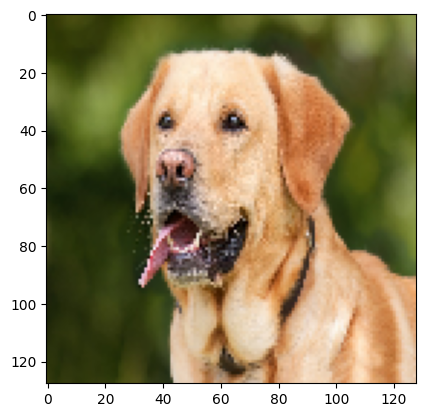

In [63]:
img = tf.keras.utils.load_img("dataset/single_prediction/cat_or_dog_1.jpg", target_size=image_size)
plt.imshow(img)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.keras.ops.expand_dims(img_array, 0)  # Create batch axis

predictions = model.predict(img_array)
score = float(tf.keras.ops.sigmoid(predictions[0][0]))
print(f"This image is {100 * (1 - score):.2f}% cat and {100 * score:.2f}% dog.")